In [1]:
import pandas as pd
import networkx as nx
import regex as re
import matplotlib.pyplot as plt
import matplotlib as mat

In [2]:
df = pd.read_pickle("US_Accidents_Processed_df.pkl")

# remove (general) as one of the options in findings!

In [3]:
# All of the different findings to split into network diagrams
findings_ls = list(set(df['finding_description']))
findings_ls

['Aircraft-Aircraft systems-Flight control system-Control column section-Failure - C',
 'Environmental issues-Conditions/weather/phenomena-Wind-Variable wind-Not specified',
 'Aircraft-Aircraft systems-Landing gear system-Nose/tail gear attach section-Capability exceeded - C',
 'Personnel issues-Psychological-Attention/monitoring-Attention-ATC personnel',
 'Aircraft-Aircraft systems-Fuel system-Fuel quantity sensor-Incorrect service/maintenance - C',
 'Aircraft-Aircraft propeller/rotor-Propeller system-Prop/spinner section-Inadequate inspection - C',
 'Environmental issues-Conditions/weather/phenomena-Wind-(general)-Decision related to condition',
 'Environmental issues-Physical environment-Runway/land/takeoff/taxi surface-Snow/slush/ice covered surface-Ability to respond/compensate',
 'Aircraft-Aircraft power plant-Engine exhaust-Thrust reverser-Incorrect use/operation - F',
 'Personnel issues-Psychological-Attention/monitoring-Monitoring other person-Designated examiner - C',
 'Envir

In [4]:
# Count the number of layers that will be needed in the network diagram
word_no = len(re.split('-', findings_ls[0]))
print(word_no)

6


In [5]:
# identify the unique words for each layer
type_ls = []
sys_ls = []
subsys_ls = []
details_ls = []
moredet_ls = []
ix = 0
for finding in findings_ls:
    # for each finding I want to append each word to a separate list
    # but I also want the connections
    ix += 1
    word_ls = re.split('-', finding)
    if len(word_ls) >= 5:
        type_ls.append(word_ls[0])
        sys_ls.append(word_ls[1])
        subsys_ls.append(word_ls[2])
        details_ls.append(word_ls[3])
        moredet_ls.append(word_ls[4])
    else:
        type_ls.append(word_ls[0])
        sys_ls.append(word_ls[1])
        subsys_ls.append(word_ls[2])

In [6]:
type_ls = set(type_ls)
sys_ls = set(sys_ls)
subsys_ls = set(subsys_ls)
details_ls = set(details_ls)
moredet_ls = set(moredet_ls)

## Create the network diagram of the connections

In [7]:
def NetworkLinks(type_ls, findings_ls, ix1, ix2):
    LinkDict = {}
    for type_name in type_ls:
        ls = []
        for finding in findings_ls:
            type_names_found = re.split('-', finding)
            if len(type_names_found) < 2:
                continue
            else:
                type_name_found = type_names_found[ix1]
                system = re.split('-', finding)[ix2]
                if type_name == type_name_found:
                    ls.append(system)
                else:
                    continue
        ls = list(set(ls))
        LinkDict[type_name] = ls 
    return LinkDict

In [8]:
def NetworkLinks_ver2(subsys_ls, findings_ls, ix1, ix2): # only for subsystem to more details
    LinkDict = {}
    for type_name in subsys_ls:
        ls = []
        for finding in findings_ls:
            type_names_found = re.split('-', finding)
            if len(type_names_found) <= 3: # condition for the 
                continue
            else:
                type_name_found = type_names_found[ix1]
                system = type_names_found[ix2]
                if type_name == type_name_found:
                    ls.append(system)
                else:
                    continue
        ls = list(set(ls))
        LinkDict[type_name] = ls
    return LinkDict

In [15]:
type_to_sys = NetworkLinks(type_ls, findings_ls, 0, 1)
sys_to_sub = NetworkLinks_ver2(sys_ls, findings_ls, 1, 2)
sub_to_det = NetworkLinks_ver2(subsys_ls, findings_ls, 2, 3) # need to add an extra condition for sets of strings that don't have any more words
det_to_more = NetworkLinks_ver2(details_ls, findings_ls, 3, 4)

In [16]:
list(sys_to_sub.values())[0]

['Rotorcraft flight control',
 'Main rotor drive',
 'Main rotor system',
 'Tail rotor',
 'Propeller system',
 'Tail rotor drive system',
 '(general)']

In [17]:
key_ls = list(type_to_sys.keys())
value_ls = list(type_to_sys.values())

In [18]:
value_ls

[['Simulated malf/failure ',
  'Damaged/degraded ',
  'Inoperative ',
  'Capability exceeded '],
 ['Not determined'],
 ['Operating environment',
  'Conditions/weather/phenomena',
  'Task environment',
  'Physical environment'],
 ['Fluids/misc hardware',
  'Aircraft systems',
  'Aircraft power plant',
  'Aircraft propeller/rotor',
  'Aircraft handling/service',
  'Aircraft oper/perf/capability',
  'Aircraft structures'],
 ['Physical',
  'Psychological',
  'Task performance',
  'Action/decision',
  'Experience/knowledge',
  'Miscellaneous'],
 ['Support/oversight/monitoring', 'Development', 'Management']]

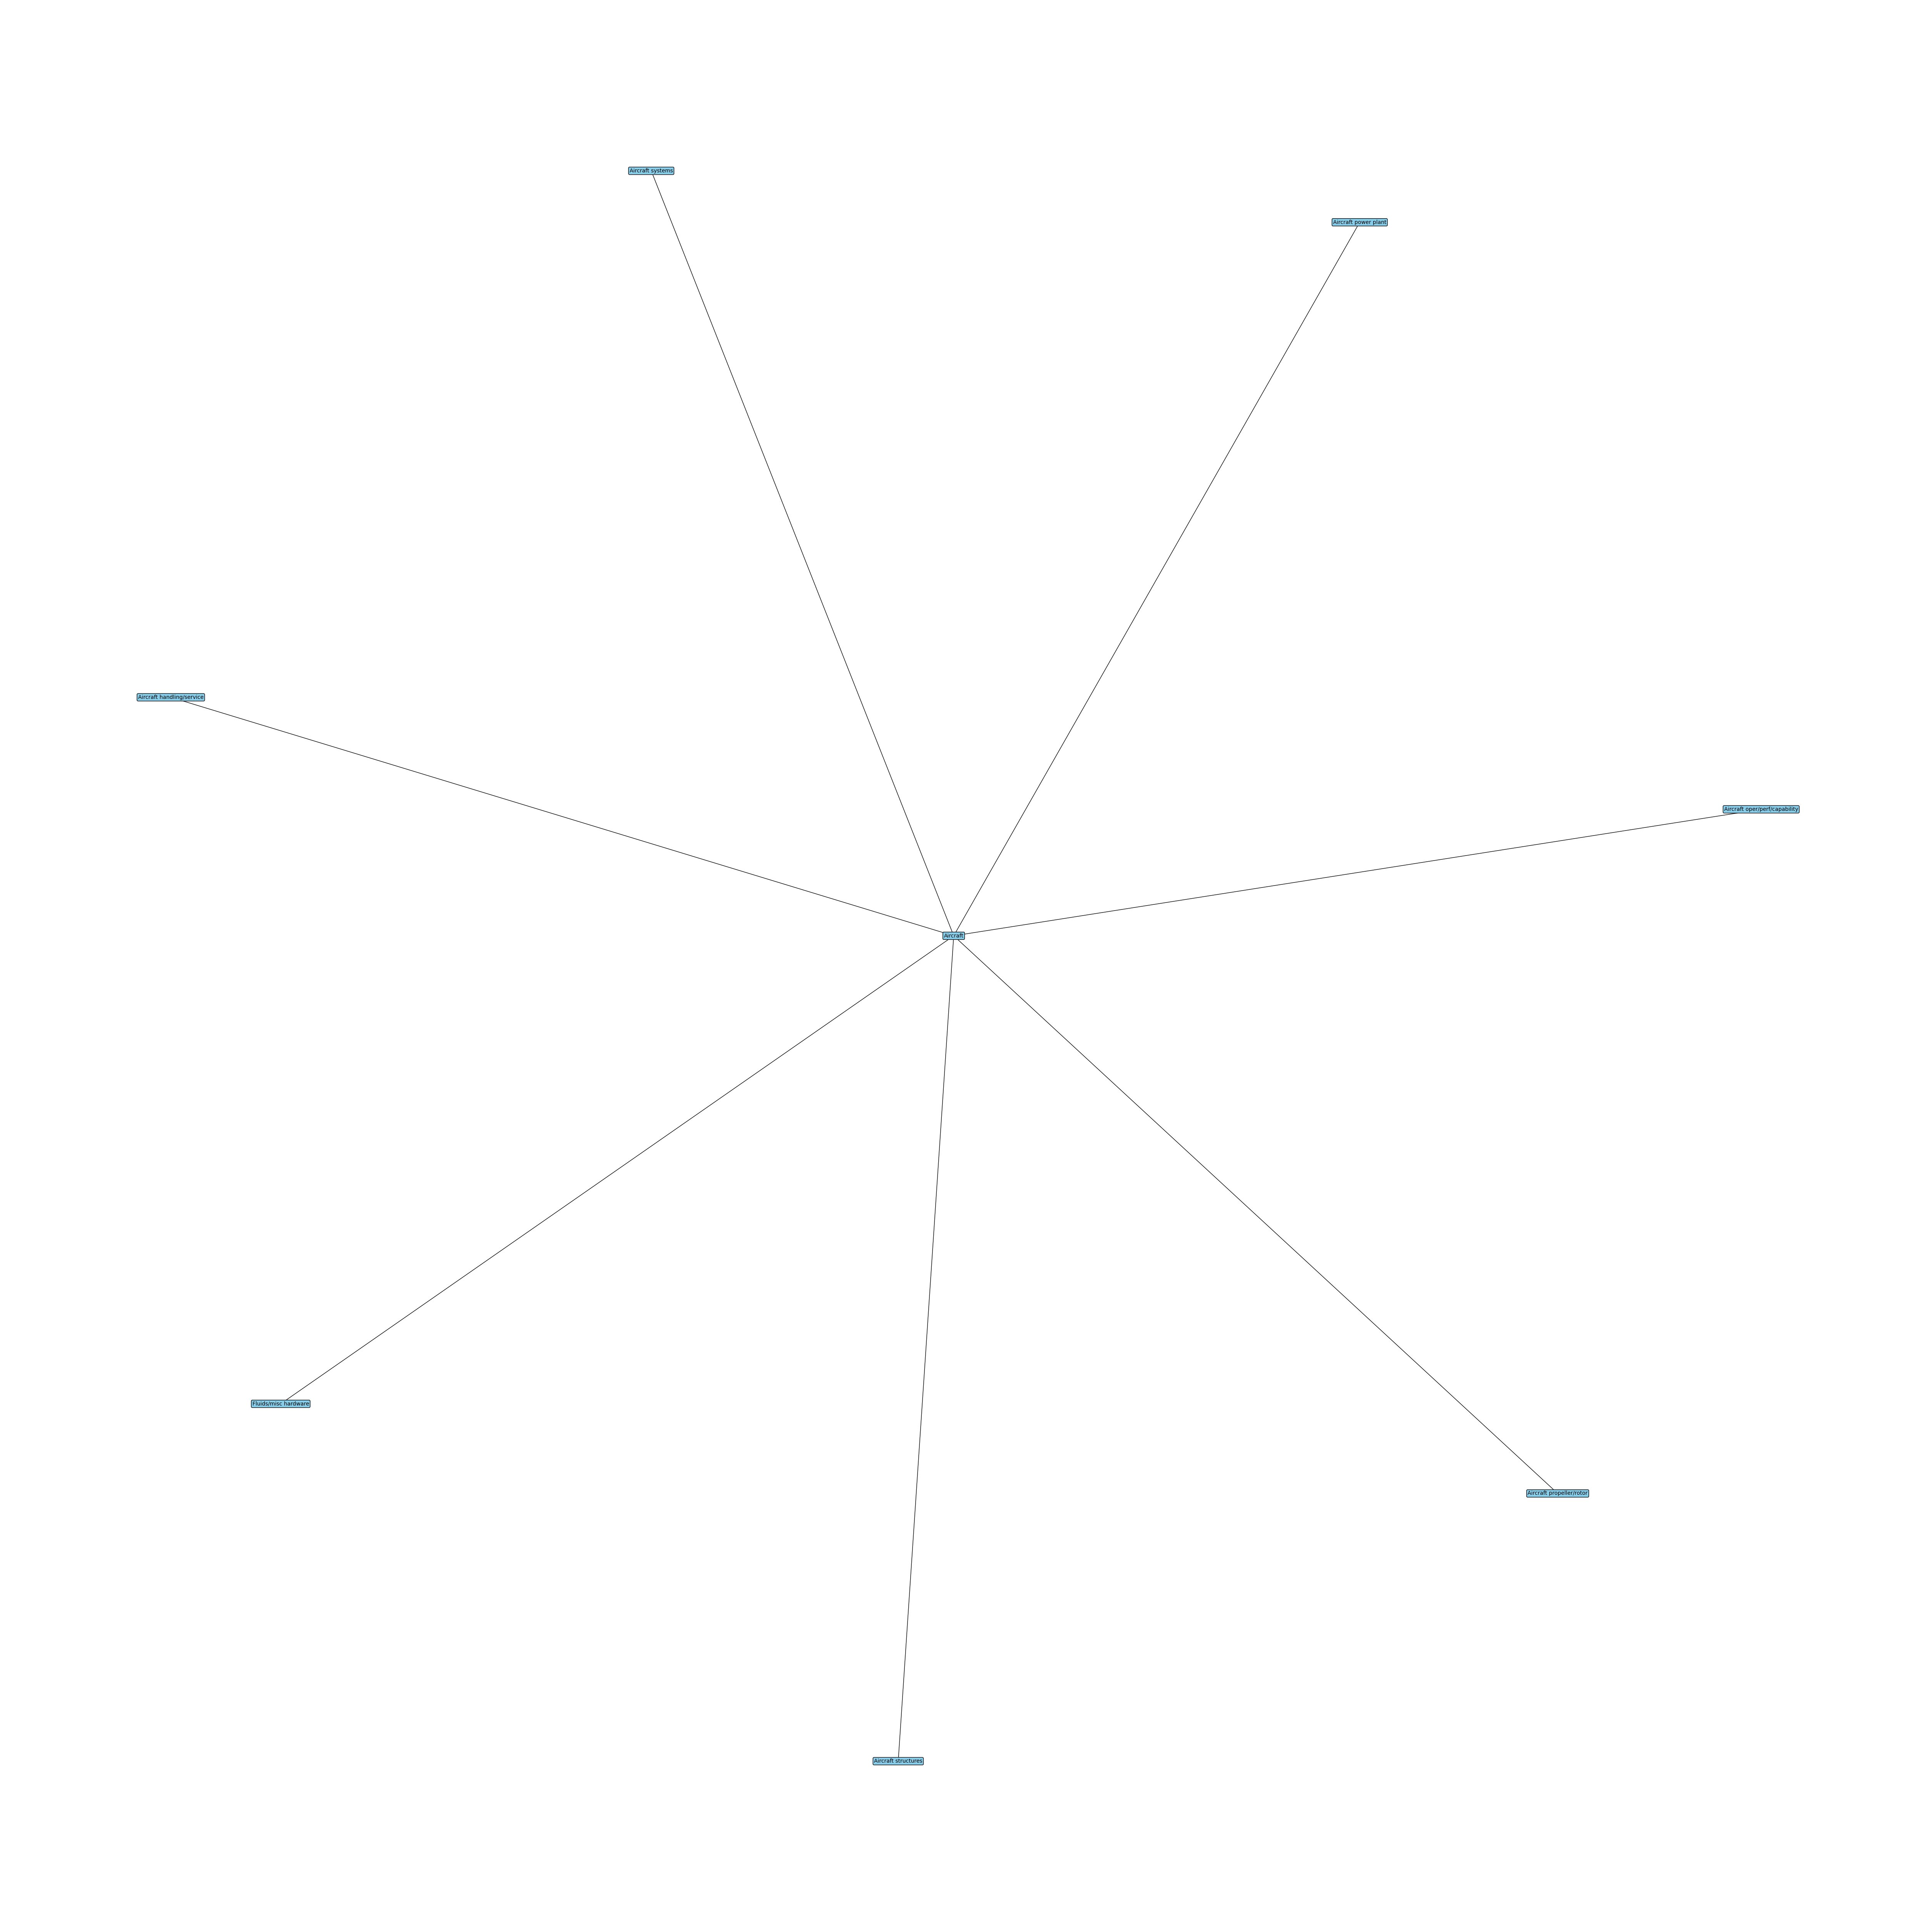

In [104]:
type_no = 3
plt.figure(3,figsize=(50, 50)) 
G = nx.Graph()
for value in value_ls[type_no]:
    G.add_edge(key_ls[type_no], value)
nx.draw(G, with_labels = True, node_shape="s", node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round, pad=0.2'), font_size=10)
plt.show()

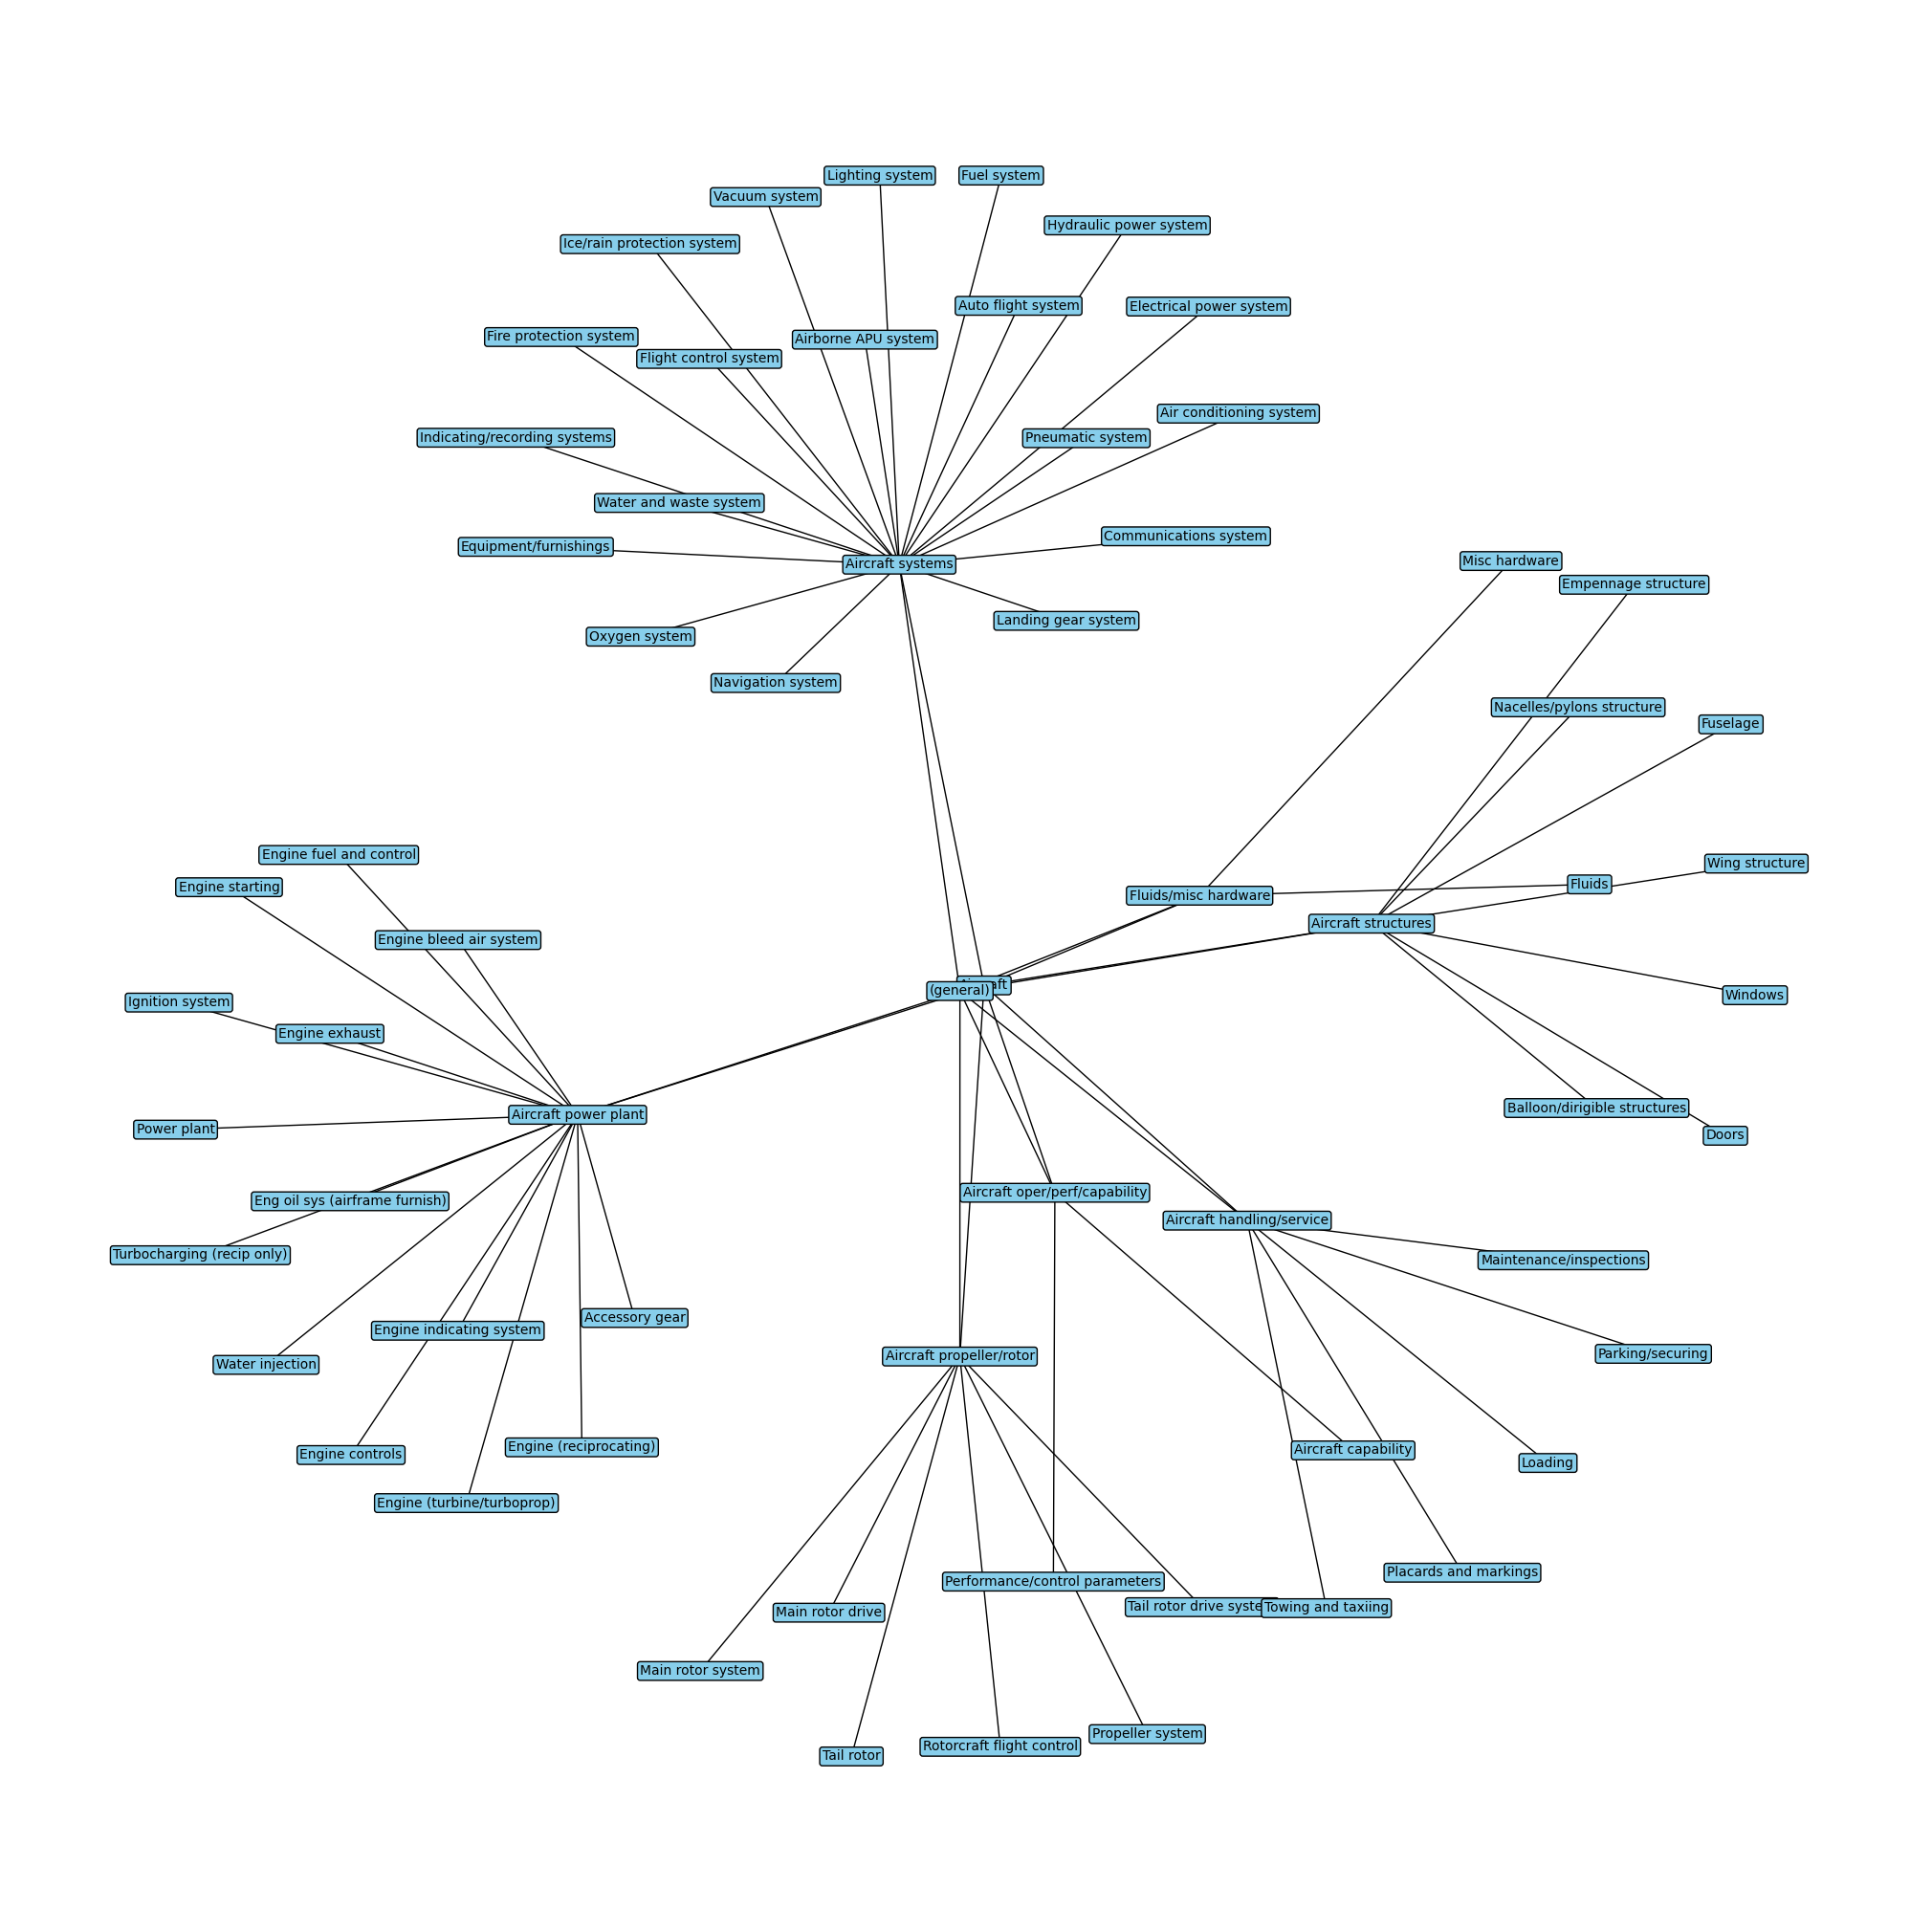

In [110]:
# How to build on top of the graph already made?
sys_to_sub_ls = list(sys_to_sub.keys())
value_test_ls = []
plt.figure(3,figsize=(20, 20)) 
# pos = nx.bfs_layout(G, key_ls[type_no]) # recreation of the layout I've been using for my spider diagrams
pos = nx.kamada_kawai_layout(G, scale = 10) # recommended layout type for clearest visualisation BUT overlapping labels
for value in value_ls[type_no]:
    for system in sys_to_sub_ls:
        if value == system:
            for subsys in sys_to_sub[system]:
                value_test_ls.append(subsys)
                G.add_edge(system, subsys)
nx.draw(G, pos=pos, with_labels = True, node_shape="s", node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round, pad=0.2'), font_size=10)
plt.show()

In [87]:
value_test_ls

['Fluids',
 'Misc hardware',
 '(general)',
 'Pneumatic system',
 'Landing gear system',
 'Communications system',
 'Air conditioning system',
 'Electrical power system',
 'Hydraulic power system',
 'Auto flight system',
 'Fuel system',
 'Lighting system',
 'Airborne APU system',
 'Vacuum system',
 'Ice/rain protection system',
 'Fire protection system',
 '(general)',
 'Flight control system',
 'Indicating/recording systems',
 'Equipment/furnishings',
 'Oxygen system',
 'Water and waste system',
 'Navigation system',
 'Engine bleed air system',
 'Engine fuel and control',
 'Engine exhaust',
 'Engine starting',
 'Ignition system',
 'Power plant',
 'Eng oil sys (airframe furnish)',
 'Turbocharging (recip only)',
 'Water injection',
 'Engine controls',
 '(general)',
 'Engine (turbine/turboprop)',
 'Engine indicating system',
 'Engine (reciprocating)',
 'Accessory gear',
 'Rotorcraft flight control',
 'Main rotor drive',
 'Main rotor system',
 'Tail rotor',
 'Propeller system',
 'Tail rotor

In [88]:
# do it part by part
# only select 5 conditions to develop
#value_test_ls = value_test_ls[0:5]

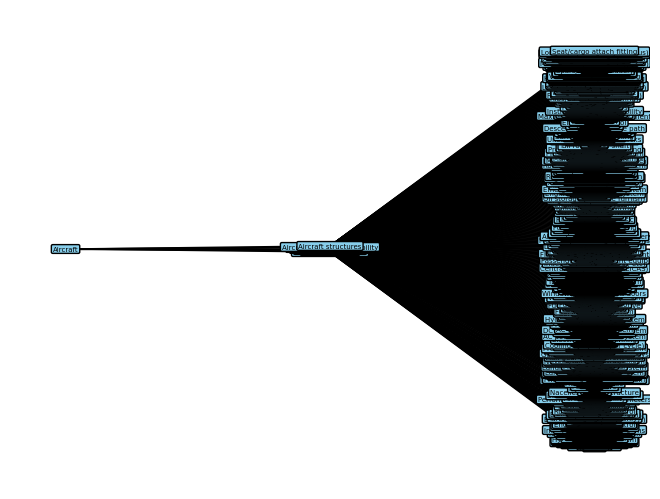

In [96]:
# repeat the process for the other details
sub_to_det_ls = list(sub_to_det.keys())
# pos = nx.bfs_layout(G, key_ls[type_no]) #would this one work where each branch becomes its own layout
# Ideally limit the number of loops based on thevalues already in the chart
for value in value_test_ls:
    for subsystem in sub_to_det_ls:
        if value == subsystem:
            for subsys in sub_to_det[subsystem]:
                G.add_edge(system, subsys)
nx.draw(G, pos=pos, with_labels = True, node_shape="s", node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round, pad=0.2'), font_size=5)
plt.show()

In [15]:
# How to build on top of the graph already made?
sys_to_sub_ls = list(sys_to_sub.keys())
sub_ls = list(sys_to_sub.values())
fig = plt.figure()
for value in value_ls[type_no]:
    for system in sys_to_sub_ls:
        if value == system:
            for subsys in sys_to_sub[system]:
                G.add_edge(system, subsys)
nx.draw(G, with_labels = True, node_shape="s", node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round, pad=0.2'), font_size=5, ax=fig.add_subplot())
if True: 
    # Save plot to file
    # mat.use("Agg") 
    fig.savefig("graph.png")

C:\Users\yxb19198\AppData\Local\Temp\ipykernel_10756\889855193.py:13: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  mat.use("Agg")


In [17]:
list(sys_to_sub.keys())

['Conditions/weather/phenomena',
 'Aircraft systems',
 'Aircraft handling/service',
 'Experience/knowledge',
 'Capability exceeded ',
 'Task environment',
 'Operating environment',
 'Action/decision',
 'Development',
 'Simulated malf/failure ',
 'Fluids/misc hardware',
 'Task performance',
 'Support/oversight/monitoring',
 'Inoperative ',
 'Aircraft power plant',
 'Psychological',
 'Physical',
 'Not determined',
 'Management',
 'Aircraft structures',
 'Physical environment',
 'Aircraft oper/perf/capability',
 'Miscellaneous',
 'Damaged/degraded ',
 'Aircraft propeller/rotor']

In [18]:
value_ls = list(type_to_sys.values())
value_ls[0]

['Conditions/weather/phenomena',
 'Task environment',
 'Physical environment',
 'Operating environment']

In [19]:
sys_dict

NameError: name 'sys_dict' is not defined